# Linear Regression on Advertising Data

## Submitted by: *Ashmina T.*

**Objective:** A textile company regularly spent money on five advertising companies for their ads. Analyze the dataset and answer the following questions:  
1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.
2. Build a regression model to predict the profit from the given data and comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the following amount for advertisement.
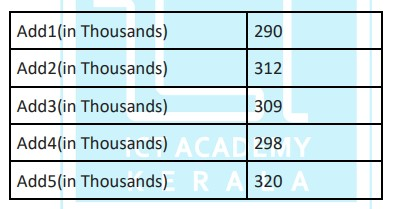

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
#loading the dataset
textile_data = pd.read_csv('sales_data.csv')

In [3]:
#retrieving the first 5 rows in the dataset
textile_data.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [4]:
#renaming the columns for easy access
textile_data.columns = ['Date','Ad1','Ad2','Ad3','Ad4','Ad5','profit']

In [5]:
#displaying the column names
textile_data.columns

Index(['Date', 'Ad1', 'Ad2', 'Ad3', 'Ad4', 'Ad5', 'profit'], dtype='object')

In [6]:
#getting concise summary of the dataset
textile_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    205 non-null    object 
 1   Ad1     205 non-null    float64
 2   Ad2     205 non-null    float64
 3   Ad3     205 non-null    float64
 4   Ad4     205 non-null    float64
 5   Ad5     205 non-null    float64
 6   profit  205 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.3+ KB


In [7]:
#statistical summary of the dataset
textile_data.describe()

,Ad1,Ad2,Ad3,Ad4,Ad5,profit
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [8]:
#checking for null values
textile_data.isna().sum()

Date      0
Ad1       0
Ad2       0
Ad3       0
Ad4       0
Ad5       0
profit    0
dtype: int64

## 1. First of all, check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

In [9]:
#getting the correlation coefficient of 5 ads with the profit
rel_data = textile_data.drop('profit',axis=1).corrwith(textile_data['profit'])
print("Correlation between amount spent for advertising through five different companies and profit is as given below:\n{}"
      .format(rel_data))

Correlation between amount spent for advertising through five different companies and profit is as given below:
Ad1    0.991975
Ad2    0.999145
Ad3    0.993389
Ad4    0.993346
Ad5    0.993710
dtype: float64


Amount spent on all the five ads are having high correlation with the profit

## 2. Build a regression model to predict the profit from the given data and comment your findings on it.

#### Feature reduction

In order to decide which features to be included in the features matrix(predictor variables) we have to find pairwise correlation of all columns in the dataset. 

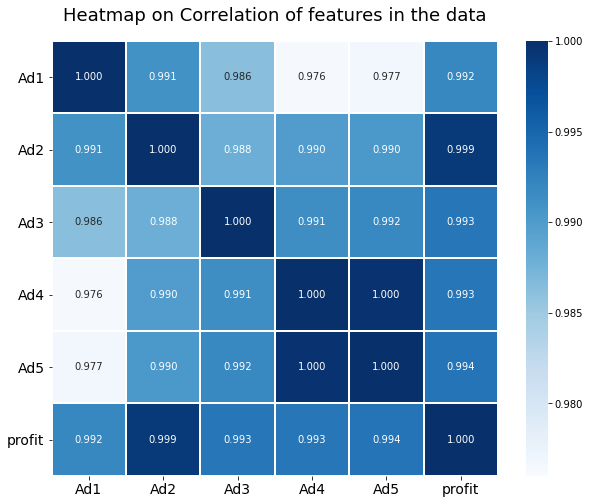

In [10]:
#heatmap showing correlation between numerical columns
plt.figure(figsize = (10,8) )
plt.title('Heatmap on Correlation of features in the data',fontsize=18,pad=20)
sns.heatmap(textile_data.corr(),annot = True,vmin=0.976,vmax=1,linewidth=0.2,fmt='.3f',cmap='Blues')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14,rotation=0)
plt.show()

Since all the five features are highly correlated with each other and with the target feature(profit), we don't have to exclude any of them.

#### Arrange Data into Feature Matrix and Target vector

In [11]:
#deleting Date column as it is not a numerical column 
data1 = textile_data.drop(['Date'],axis=1)

In [12]:
#creating feature matrix
X = data1.drop(['profit'],axis=1)

In [13]:
X.shape

(205, 5)

In [14]:
#Creating Target vector
y = data1.profit

In [15]:
y.shape

(205,)

#### Split Data into Training and Testing sets

In [16]:
#Taking 80% of the data as Training data and 20% of the data as Testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=25)

#### Creating an instance of the model

In [17]:
#creating an instance of the Linear Regression model
lr=linear_model.LinearRegression(fit_intercept=True)

#### Training the model

In [18]:
#training the model with the training data
model = lr.fit(X_train,y_train)

#### Testing the model

In [19]:
#testing the model with the test data
predictions = model.predict(X_test)

In [20]:
#displaying the predicted values
print(predictions)

[4451.999 5167.878 5917.925 4672.391 5030.451 5373.275 5133.766 5175.051
 5177.61  5153.977 5190.814 5858.34  5027.633 4648.834 4486.996 5057.155
 5425.19  5185.639 5182.368 5580.775 5065.652 5212.949 5728.804 5263.935
 4411.775 5163.693 6101.648 5421.94  4418.709 4705.198 4643.716 5498.553
 5107.437 4453.205 4836.837 4647.356 5004.282 5378.379 4419.421 5676.934
 5511.42 ]


Now we have to compare the predicted values and the actual output values.

In [21]:
#displaying the first 5 predicted values
print(predictions[:5])

[4451.999 5167.878 5917.925 4672.391 5030.451]


In [22]:
#displaying the first 5 actual output values
print(y_test.head())

26     4451.999
122    5167.878
190    5917.925
43     4672.391
69     5030.451
Name: profit, dtype: float64


The predicted and the actual output values seems to be equal.

#### Measuring Model Performance

In [23]:
#calculating the mean squared error
print("MSE :",mean_squared_error(y_test,predictions))

MSE : 4.64028148505357e-25


As the MSE(Mean squared error) is very close to zero, the predicted values strongly resembles the actual output values.

In [24]:
#calculating the coefficient of determination
print("Coefficient of determination(R\u00b2): %.2f"%r2_score(y_test,predictions))

Coefficient of determination(R²): 1.00


Since the Coefficient of determination (R<sup>2</sup>) is 1, 100% of the variation in the output variable is explained by the input variables.  
Overall the model seems to be perfect.

## 3. Predict the profit generated by the company, if they wish to spend the given amount for advertisements

In [25]:
#data for which the output is to be predicted
sample = [[290,312,309,298,320]]

In [26]:
#predicting the output value
predicted_profit = model.predict(sample)
print("The profit for the given data predicted by the model is {} thousands.".format(predicted_profit[0]))

The profit for the given data predicted by the model is 5820.06 thousands.
